In [117]:
# max distribution of n dice roll  (n:1,2,3)
# 
# TakaDoi 2021-06-26 

# Reload all modules (except those excluded by %aimport) 
%load_ext autoreload
%autoreload 2

# Clear variables (forced)
%reset -f

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [118]:
# Matplot lib setup
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_context('paper')

# sns.set_style('whitegrid')
# sns.set_style('dark')

In [119]:
# Free parameters 
num_simulations = 10000

In [120]:
# Fixed parameters 
max_dice_roll = 6
num_dice_roll = [1,2,3]

In [121]:
df = pd.DataFrame()
for n in num_dice_roll:
    r = np.random.randint(max_dice_roll, size=(num_simulations, n)) # random integer samples [0-5] 
    r = r+1 # make it to a die roll number
    m = np.amax(r, axis=1) # take max along n-roll axis 
    # print(r) 
    # print('max', m)
    # print('--------')
    
    col_name = 'N' + str(n) + '_Dice_Roll'
    df[col_name] = m

In [122]:
df.describe()

,N1_Dice_Roll,N2_Dice_Roll,N3_Dice_Roll
count,10000.000000,10000.00000,10000.000000
mean,3.488300,4.45220,4.950400
std,1.707851,1.41291,1.148857
min,1.000000,1.00000,1.000000
25%,2.000000,3.00000,4.000000
50%,4.000000,5.00000,5.000000
75%,5.000000,6.00000,6.000000
max,6.000000,6.00000,6.000000


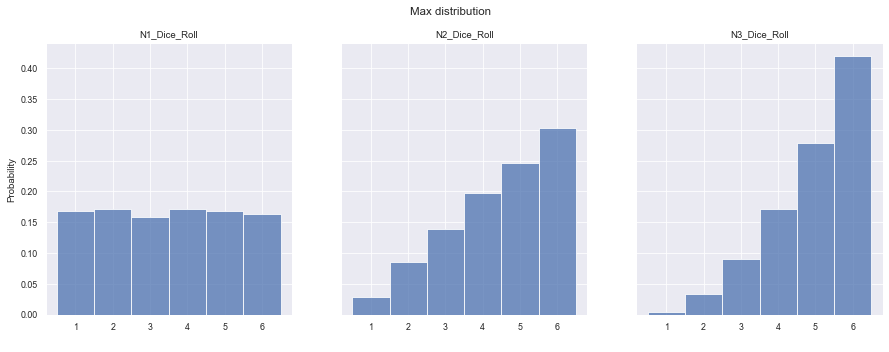

In [123]:
# Plotting 
num_rows = 1
num_cols = len(num_dice_roll) 
fig, axes = plt.subplots(num_rows, num_cols, figsize = (15,5), sharey=True)
fig.suptitle('Max distribution')

i = 0
for (col_name, col_data) in df.iteritems():
    sns.histplot(data=df, x = col_name, discrete=True, stat='probability', ax=axes[i])
    axes[i].set_title(col_name)
    axes[i].set_xlabel(' ')
    i+=1